In [1]:

import numpy as np
import sklearn
import pickle

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd

In [3]:
#import pylab as plb
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.style.use('ggplot')

In [5]:
df = pd.read_csv("C:/Users/vysh/Downloads/banking_updated.csv")

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [7]:
df.drop(['duration','contact','month','day_of_week','default','pdays',],axis=1,inplace=True)

In [8]:

df.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,yes,no,1,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,1,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,yes,no,3,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,2,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,yes,no,1,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [9]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
campaign          0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [10]:

df.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)
import seaborn as sns

<AxesSubplot:xlabel='y', ylabel='count'>

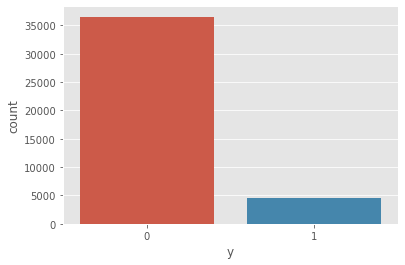

In [11]:
sns.countplot(x='y', data=df)

<AxesSubplot:xlabel='count', ylabel='job'>

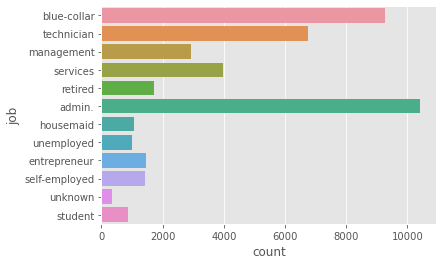

In [12]:
sns.countplot(y='job', data=df)

<AxesSubplot:xlabel='marital', ylabel='count'>

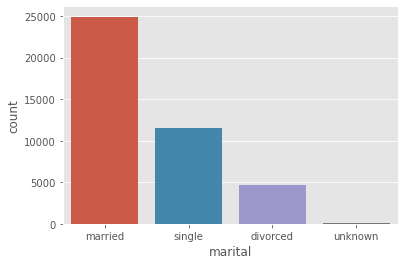

In [13]:
sns.countplot(x='marital', data=df)

In [14]:
df.education.value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

<AxesSubplot:xlabel='count', ylabel='education'>

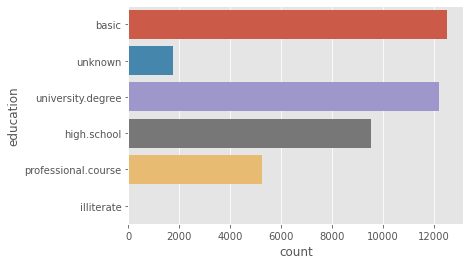

In [15]:

sns.countplot(y='education', data=df)

In [16]:

#data pre-processing
le = preprocessing.LabelEncoder()

In [17]:
df.job = le.fit_transform(df.job)
df.marital = le.fit_transform(df.marital)
df.education = le.fit_transform(df.education)
df.housing = le.fit_transform(df.housing)
df.loan = le.fit_transform(df.loan)
df.poutcome = le.fit_transform(df.poutcome)


In [18]:
X = df.iloc[:,0:14]
X[0:10]


,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,1,1,0,2,0,1,0,1,1.4,93.444,-36.1,4.963,5228.1
1,53,9,1,5,0,0,1,0,1,-0.1,93.200,-42.0,4.021,5195.8
2,28,4,2,4,2,0,3,2,2,-1.7,94.055,-39.8,0.729,4991.6
3,39,7,1,1,0,0,2,0,1,-1.8,93.075,-47.1,1.405,5099.1
4,55,5,1,0,2,0,1,1,2,-2.9,92.201,-31.4,0.869,5076.2
5,30,4,0,0,2,0,8,0,1,1.4,93.918,-42.7,4.961,5228.1
6,37,1,1,0,2,0,1,0,1,-1.8,92.893,-46.2,1.327,5099.1
7,39,1,0,0,2,0,1,0,1,-1.8,92.893,-46.2,1.313,5099.1
8,36,0,1,4,0,0,1,1,2,-2.9,92.963,-40.8,1.266,5076.2
9,27,1,2,0,2,0,2,1,0,-1.8,93.075,-47.1,1.410,5099.1


In [19]:
y = df.iloc[:,14]
y[0:10]


0    0
1    0
2    1
3    0
4    1
5    0
6    0
7    0
8    1
9    0
Name: y, dtype: int64

In [20]:

#train dataset
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0) #80/20 split

In [21]:
x_train.shape, y_train.shape


((32950, 14), (32950,))

In [22]:
x_test.shape, y_test.shape

((8238, 14), (8238,))

In [23]:
#training the model
model=LogisticRegression(penalty='l2', max_iter=1000)
model.fit(x_train, y_train)
prediction=model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.9033746054867686

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

[[7262   63]
 [ 733  180]]


In [25]:

from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8891721291575625

In [26]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
predict = rfc.predict(x_test)
accuracy_score(y_test, predict)


0.8928137897547949